In [37]:
# Import dependencies
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [10]:
# Load in dataset
student_df = pd.read_csv('Resources/Maths.csv')
# setting to display all columns
pd.set_option("display.max_columns", None)
student_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,3,3,3,5,5,8,9,9
395,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6


In [15]:
# Rename some columns for clarity
student_df.rename(columns = {'Pstatus':'parentcohab', 'reason':'schoolreason', 'schoolsup':'schoolsupport',
                     'famsup':'familysupport', 'paid':'paidclasses', 'higher':'higheredu', 'famrel':'familyrelationships',
                     'Dalc':'weekdayalcohol', 'Walc':'weekendalcohol'}, inplace = True)
student_df.head()

,school,sex,age,address,famsize,parentcohab,Medu,Fedu,Mjob,Fjob,schoolreason,guardian,traveltime,studytime,failures,schoolsupport,familysupport,paidclasses,activities,nursery,higheredu,internet,romantic,familyrelationships,freetime,goout,weekdayalcohol,weekendalcohol,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [18]:
# Check for null values
student_df.isna().sum()

school                 0
sex                    0
age                    0
address                0
famsize                0
parentcohab            0
Medu                   0
Fedu                   0
Mjob                   0
Fjob                   0
schoolreason           0
guardian               0
traveltime             0
studytime              0
failures               0
schoolsupport          0
familysupport          0
paidclasses            0
activities             0
nursery                0
higheredu              0
internet               0
romantic               0
familyrelationships    0
freetime               0
goout                  0
weekdayalcohol         0
weekendalcohol         0
health                 0
absences               0
G1                     0
G2                     0
G3                     0
dtype: int64

In [43]:
# Create list of categorical variables
catList = student_df.select_dtypes(include = "object").columns
catList

Index(['school', 'sex', 'address', 'famsize', 'parentcohab', 'Mjob', 'Fjob',
       'schoolreason', 'guardian', 'schoolsupport', 'familysupport',
       'paidclasses', 'activities', 'nursery', 'higheredu', 'internet',
       'romantic'],
      dtype='object')

In [47]:
# Count unique values in categorical variables
student_df.select_dtypes(include = "object").nunique(axis=0)

school           2
sex              2
address          2
famsize          2
parentcohab      2
Mjob             5
Fjob             5
schoolreason     4
guardian         3
schoolsupport    2
familysupport    2
paidclasses      2
activities       2
nursery          2
higheredu        2
internet         2
romantic         2
dtype: int64

In [48]:
# Encode the data with skikit learn LabelEncoder
le = LabelEncoder()
stu_df_encoded = student_df.copy()
stu_df_encoded[catList] = stu_df_encoded[catList].apply(le.fit_transform)
stu_df_encoded

,school,sex,age,address,famsize,parentcohab,Medu,Fedu,Mjob,Fjob,schoolreason,guardian,traveltime,studytime,failures,schoolsupport,familysupport,paidclasses,activities,nursery,higheredu,internet,romantic,familyrelationships,freetime,goout,weekdayalcohol,weekendalcohol,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,1,1,21,0,0,1,1,1,2,2,0,2,1,1,3,0,0,0,0,0,1,0,0,5,5,3,3,3,3,3,10,8,7
393,1,1,18,0,1,1,3,2,3,2,0,1,3,1,0,0,0,0,0,0,1,1,0,4,4,1,3,4,5,0,11,12,10
394,1,1,19,1,1,1,1,1,2,0,0,0,1,1,0,0,0,0,0,1,1,1,0,3,2,3,3,3,5,5,8,9,9
395,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6


In [72]:
# Check correlation of all features (except failures and previous grades) with overall grade
corr = stu_df_encoded.corr()[['G3']].abs().sort_values(by='G3', ascending=False).drop(['failures','G1','G2','G3'], axis=0)
corr

,G3
Medu,0.220783
higheredu,0.179180
age,0.172175
Fedu,0.155256
goout,0.127760
romantic,0.123085
traveltime,0.122475
schoolreason,0.119830
internet,0.114395
address,0.113765


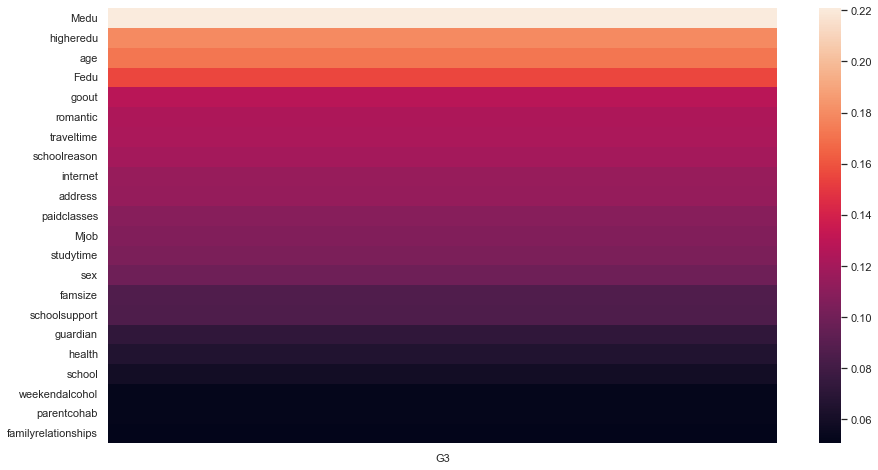

In [74]:
# Heatmap - grade on one axis, percentage of binary conditions on the other
# Filter by 0.05 correlation of above (statistically significant)
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr[corr.G3 > 0.05]);

[Text(0.5, 0, "Mother's Education"), Text(0, 0.5, 'Average Math Grade')]

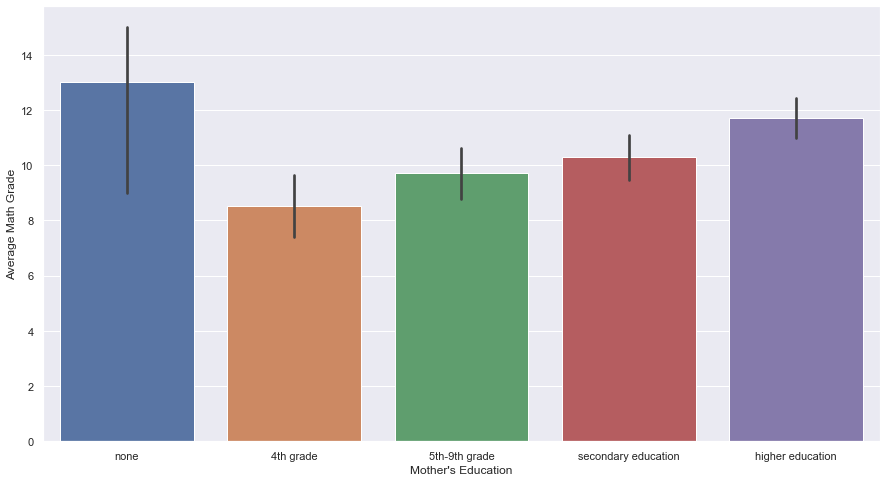

In [80]:
# Correlation between mother's education and student's final math grade
ax = sns.barplot(data=student_df, x="Medu", y="G3")
ax.set_xticklabels(['none','4th grade','5th-9th grade','secondary education','higher education'])
ax.set(xlabel="Mother's Education", ylabel='Average Math Grade')

[Text(0.5, 0, 'Wants to Take Higher Education'),
 Text(0, 0.5, 'Average Math Grade')]

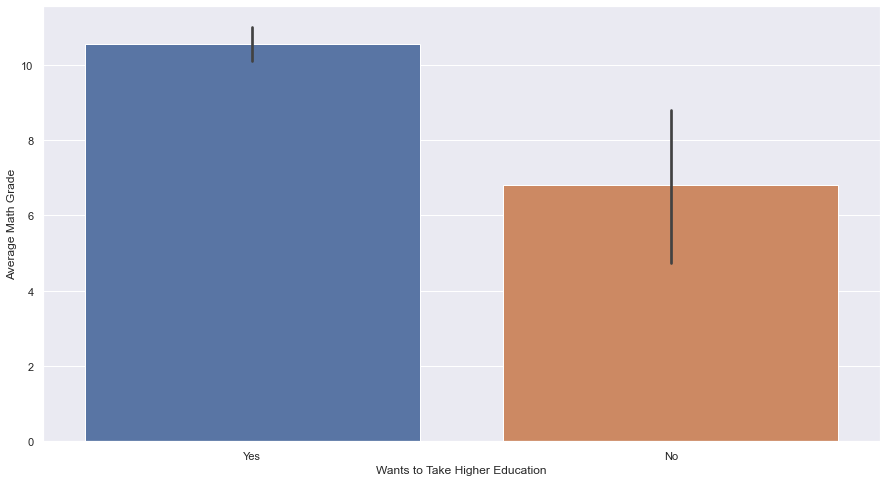

In [81]:
# Correlation between desire for higher education and student's final math grade
ax = sns.barplot(data=student_df, x="higheredu", y="G3")
ax.set_xticklabels(['Yes','No'])
ax.set(xlabel="Wants to Take Higher Education", ylabel='Average Math Grade')

[Text(0.5, 0, "Father's Education"), Text(0, 0.5, 'Average Math Grade')]

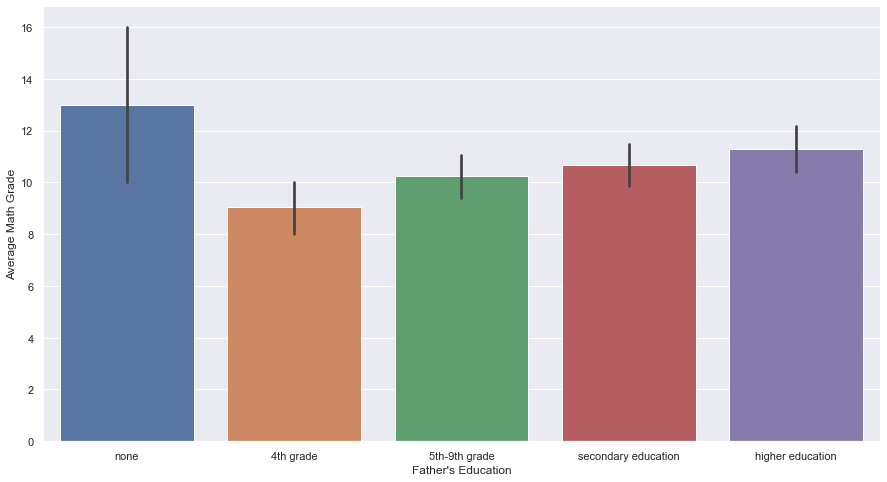

In [84]:
# Correlation between father's education and student's final math grade
ax = sns.barplot(data=student_df, x="Fedu", y="G3")
ax.set_xticklabels(['none','4th grade','5th-9th grade','secondary education','higher education'])
ax.set(xlabel="Father's Education", ylabel='Average Math Grade')

[Text(0.5, 0, 'In a Romantic Relationship'),
 Text(0, 0.5, 'Average Math Grade')]

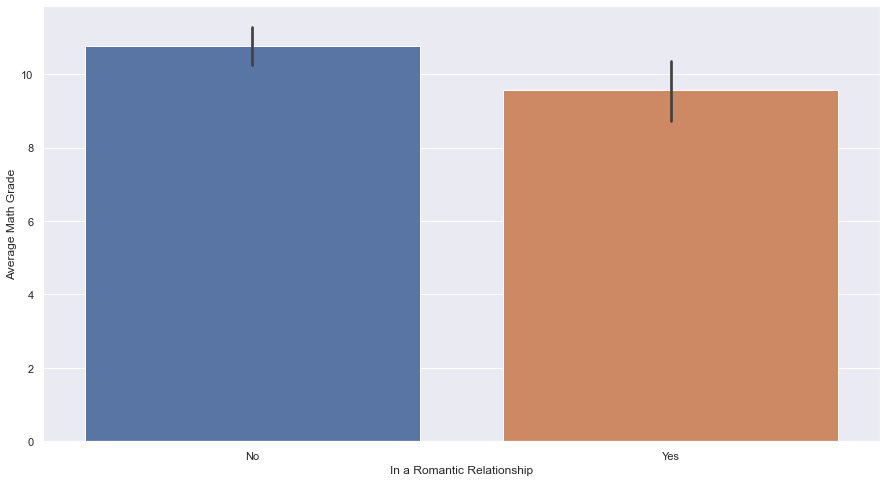

In [83]:
# Correlation between romantic relationship and student's final math grade
ax = sns.barplot(data=student_df, x="romantic", y="G3")
ax.set_xticklabels(['No','Yes'])
ax.set(xlabel="In a Romantic Relationship", ylabel='Average Math Grade')